In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [71]:
data=pd.read_csv(r"C:\Users\Theenesh\Desktop\ML_LAB\ass_2\Ecommerce Customers.csv")

In [72]:
data.shape

(500, 8)

In [73]:
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [74]:
numberdata=data.drop(columns=["Email","Address","Avatar"])
corelationmatrix=numberdata.corr()

In [75]:
corelationwithtarget=corelationmatrix["Yearly Amount Spent"].sort_values(ascending=False)
print(corelationwithtarget)

Yearly Amount Spent     1.000000
Length of Membership    0.809084
Time on App             0.499328
Avg. Session Length     0.355088
Time on Website        -0.002641
Name: Yearly Amount Spent, dtype: float64


In [76]:
x=data[["Length of Membership","Time on App"]].values
y=data["Yearly Amount Spent"].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)

In [77]:
x.shape

(500, 2)

In [78]:
xwithinter=np.c_[np.ones(x_train.shape[0]),x_train]
xtestwithinter=np.c_[np.ones(x_test.shape[0]),x_test]

In [85]:
def cost(x,y,theta):
    m=len(y)
    predictions=x.dot(theta)
    error=predictions-y
    cost=1/(2*m)*np.sum(error)**2
    return cost

#gradient descent

def gradient_descent(x,y,theta,learningrate,iterations):
    m=len(y)
    cost_history=[]
    for i in range(iterations):
        gradient=1/(m)*x.T.dot(x.dot(theta)-y)
        theta=theta-learningrate*gradient
        cost_history.append(cost(x,y,theta))
    return theta,cost_history

theta_initial=np.zeros(xwithinter.shape[1])
learningrate=0.01
iterations=1000
theta_optimal, cost_history = gradient_descent(xwithinter, y_train, theta_initial, learningrate,iterations)
print("Optimal Parameters (Theta):", theta_optimal)
print("Intercept (Theta_0):", theta_optimal[0])
print("Final Cost:", cost_history[-1])

#test_predictions = xtestwithinter.dot(theta_optimal)
test_cost = cost(xtestwithinter, y_test, theta_optimal)
print("Cost on test data:", test_cost)

Optimal Parameters (Theta): [-8.48098811 59.65232715 24.77523303]
Intercept (Theta_0): -8.480988111687962
Final Cost: 243.29283049417884
Cost on test data: 621.3308322845086


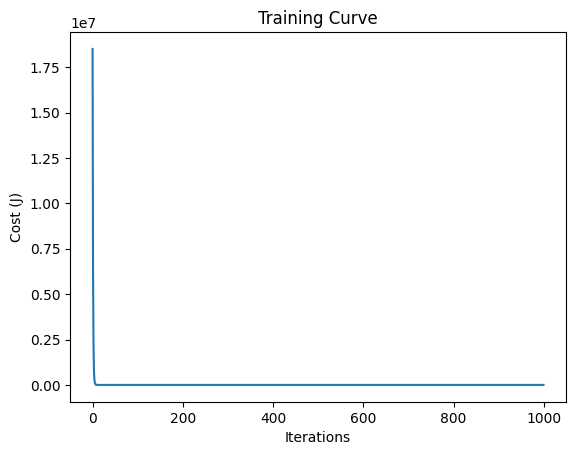

In [80]:
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost (J)")
plt.title("Training Curve")
plt.show()


In [83]:
# Function to calculate Mean Squared Error
def mean_squared_error(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    return mse



# Predictions for training and test data
train_predictions = xwithinter.dot(theta_optimal)
test_predictions = xtestwithinter.dot(theta_optimal)

# Calculate MSE for training and testing
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

# Output MSE
print("Training Mean Squared Error (MSE):", train_mse)
print("Testing Mean Squared Error (MSE):", test_mse)


Training Mean Squared Error (MSE): 923.5032529399379
Testing Mean Squared Error (MSE): 983.416688007962


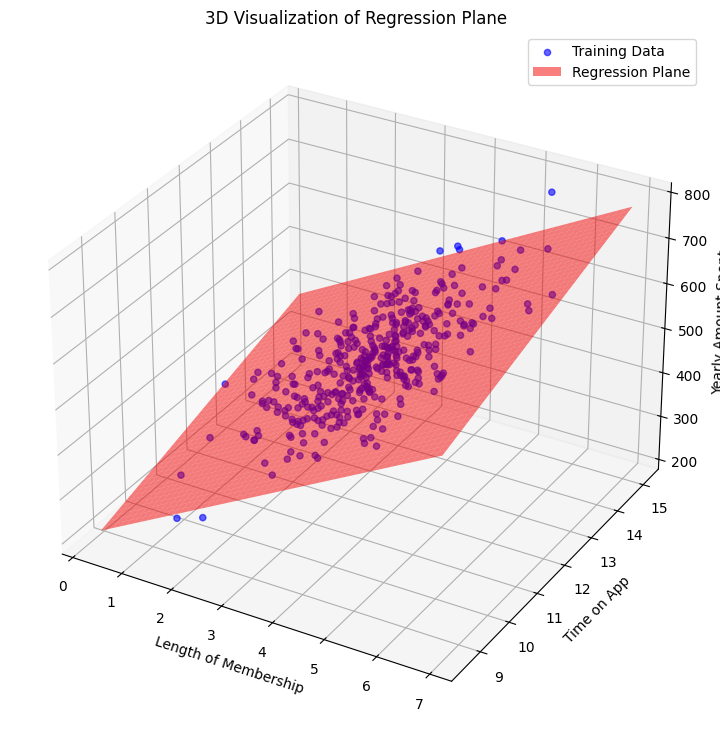

In [96]:
from mpl_toolkits.mplot3d import Axes3D

# Generate a grid for the features
x1 = np.linspace(x_train[:, 0].min(), x_train[:, 0].max(), 50)
x2 = np.linspace(x_train[:, 1].min(), x_train[:, 1].max(), 50)
x1_grid, x2_grid = np.meshgrid(x1, x2)

# Compute predictions for the grid points
X_grid = np.c_[np.ones(x1_grid.ravel().shape), x1_grid.ravel(), x2_grid.ravel()]
y_grid = X_grid.dot(theta_optimal).reshape(x1_grid.shape)


fig = plt.figure(figsize=(10, 9))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of training data
ax.scatter(x_train[:, 0], x_train[:, 1], y_train, c='blue', label='Training Data', alpha=0.6)

ax.plot_surface(x1_grid, x2_grid, y_grid, color='red', alpha=0.5, label='Regression Plane')

ax.set_xlabel("Length of Membership")
ax.set_ylabel("Time on App")
ax.set_zlabel("Yearly Amount Spent")
ax.set_title("3D Visualization of Regression Plane")
plt.legend()
plt.show()
